### Q1 Q3 of Epoch 30

In [2]:
import os
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import sys         
sys.path.append('/home/pranisaa/working_dir/Text-Summarization')        
from config import *

In [4]:
model_params = model_params
EPOCH = model_params['TRAIN_EPOCHS']
model = model_params['MODEL']
data = data
print(model_params)
print(data)

{'MODEL': 't5-small', 'TRAIN_BATCH_SIZE': 16, 'VALID_BATCH_SIZE': 16, 'TRAIN_EPOCHS': 30, 'VAL_EPOCHS': 1, 'LEARNING_RATE': 2e-05, 'SCHEDULER': 'linear', 'MAX_SOURCE_TEXT_LENGTH': 512, 'MAX_TARGET_TEXT_LENGTH': 36, 'SEED': 42}
xsum


(0.0, 3000.0)

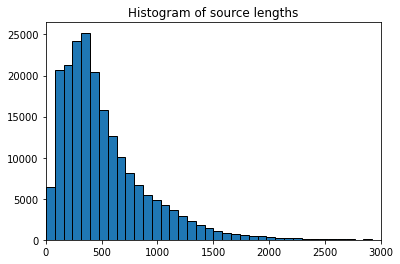

In [41]:
path_len = f"""../datalength/train_data_length_info.csv"""
df_len = pd.read_csv(path_len)
train_len = df_len['length']
plt.hist(train_len, edgecolor = 'black',
         bins = 500)
plt.title(f'Histogram of source lengths')
plt.xlim([0,3000])

(0.0, 3000.0)

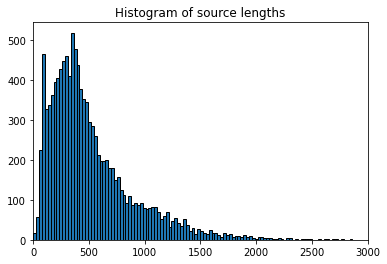

In [39]:
path_len = f"""../datalength/val_data_length_info.csv"""
df_len = pd.read_csv(path_len)
val_len = df_len['length']
plt.hist(val_len, edgecolor = 'black',
         bins = 300)
plt.title(f'Histogram of source lengths')
plt.xlim([0,3000])

#### no len restriction

In [69]:
path = f"""../model/{model_params["MODEL"]}_{data}_nolenrestriction_30epoch"""
path_df = os.path.join(path, f"result_eval/predictions_{model}_epoch{EPOCH-1}.csv")
df = pd.read_csv(path_df)
doc_id = df['ids']
rouge1 = df['RougeScore1']
rouge1_max = max(rouge1)
rouge1_min = min(rouge1)
rouge1_q1,rouge1_mean,rouge1_q3 = rouge1.quantile([0.10,0.5,0.90])
print("Min Rouge1: ", rouge1_min)
print("Q1 Rouge1: ", rouge1_q1)
print("Mean Rouge1: ", rouge1_mean)
print("Q3 Rouge1: ", rouge1_q3)
print("Max Rouge1: ", rouge1_max)

Min Rouge1:  0.0
Q1 Rouge1:  9.523809523809526
Mean Rouge1:  22.857142857142858
Q3 Rouge1:  38.0952380952381
Max Rouge1:  73.68421052631578


In [70]:
data_q1 = doc_id[rouge1<=rouge1_q1]
data_q3 = doc_id[rouge1>=rouge1_q3]

In [71]:
path_len = f"""../datalength/val_data_length_info.csv"""
df_len = pd.read_csv(path_len)
val_len_q1 = {'ids': [], 'length': []}
for idx in data_q1:
    val_len_q1['ids'].append(idx)
    length = int(df_len['length'][df_len['ids'] == idx])
    val_len_q1['length'].append(length)

In [72]:
val_len_q3 = {'ids': [], 'length': []}
for idx in data_q3:
    val_len_q3['ids'].append(idx)
    length = int(df_len['length'][df_len['ids'] == idx])
    val_len_q3['length'].append(length)

Text(0.5, 1.0, 'Histogram of source lengths')

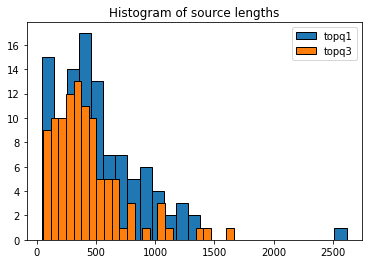

In [74]:
# matplotlib histogram
plt.hist(val_len_q1['length'], edgecolor = 'black',
         bins = 25, label = "topq1")
plt.hist(val_len_q3['length'], edgecolor = 'black',
         bins = 25, label = "topq3")
plt.legend()

plt.title(f'Histogram of source lengths')

#### Max 512

In [75]:
path = f"""../model/{model_params["MODEL"]}_{data}_lenrestriction_30epoch"""
path_df = os.path.join(path, f"result_eval/predictions_{model}_epoch{EPOCH-1}.csv")
df = pd.read_csv(path_df)
doc_id = df['ids']
rouge1 = df['RougeScore1']
rouge1_max = max(rouge1)
rouge1_min = min(rouge1)
rouge1_q1,rouge1_mean,rouge1_q3 = rouge1.quantile([0.10,0.5,0.90])
print("Min Rouge1: ", rouge1_min)
print("Q1 Rouge1: ", rouge1_q1)
print("Mean Rouge1: ", rouge1_mean)
print("Q3 Rouge1: ", rouge1_q3)
print("Max Rouge1: ", rouge1_max)

Min Rouge1:  0.0
Q1 Rouge1:  10.499325236167342
Mean Rouge1:  23.431372549019606
Q3 Rouge1:  37.83783783783783
Max Rouge1:  63.15789473684211


In [76]:
data_q1 = doc_id[rouge1<=rouge1_q1]
data_q3 = doc_id[rouge1>=rouge1_q3]

In [77]:
path_len = f"""../datalength/val_data_length_info.csv"""
df_len = pd.read_csv(path_len)
val_len_q1 = {'ids': [], 'length': []}
for idx in data_q1:
    val_len_q1['ids'].append(idx)
    length = int(df_len['length'][df_len['ids'] == idx])
    val_len_q1['length'].append(length)

In [78]:
val_len_q3 = {'ids': [], 'length': []}
for idx in data_q3:
    val_len_q3['ids'].append(idx)
    length = int(df_len['length'][df_len['ids'] == idx])
    val_len_q3['length'].append(length)

Text(0.5, 1.0, 'Histogram of source lengths')

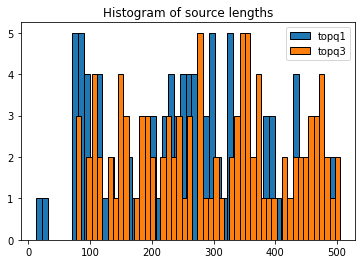

In [80]:
# matplotlib histogram
plt.hist(val_len_q1['length'], edgecolor = 'black',
         bins = 50, label = "topq1")
plt.hist(val_len_q3['length'], edgecolor = 'black',
         bins = 50, label = "topq3")
plt.legend()

plt.title(f'Histogram of source lengths')